In [110]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'  #change dir to your project folder

import numpy as np
X_train = np.load('gdrive/My Drive/dataset1/3acc/unnormalized/trainX.npy')
y_train = np.load('gdrive/My Drive/dataset1/3acc/unnormalized/trainy.npy')
X_test = np.load('gdrive/My Drive/dataset1/3acc/unnormalized/testX.npy')
y_test = np.load('gdrive/My Drive/dataset1/3acc/unnormalized/testy.npy')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Mounted at /content/drive
Mounted at /content/gdrive
(33104, 128, 3) (33104, 118) (3740, 128, 3) (3740, 118)


In [111]:
from numpy import mean
from numpy import std
from numpy import dstack
from numpy import save, load
from pandas import read_csv
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input ,concatenate
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import LSTM, Conv1D, concatenate,GlobalMaxPooling1D,TimeDistributed, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import concatenate
from tensorflow.keras import regularizers

In [112]:
from sklearn.model_selection import train_test_split
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

In [113]:
model1 = Sequential()
model1.add(LSTM(512, input_shape=(n_timesteps,n_features),return_sequences=True))
model1.add(LSTM(256))
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(n_outputs, activation='softmax'))
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model1.summary()
callbacks = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 128, 512)          1056768   
                                                                 
 lstm_38 (LSTM)              (None, 256)               787456    
                                                                 
 dropout_36 (Dropout)        (None, 256)               0         
                                                                 
 dense_54 (Dense)            (None, 128)               32896     
                                                                 
 dense_55 (Dense)            (None, 118)               15222     
                                                                 
Total params: 1,892,342
Trainable params: 1,892,342
Non-trainable params: 0
_________________________________________________________________


In [114]:
history = model1.fit(X_training, y_training, epochs=200, verbose=True, validation_data=(X_validation, y_validation), batch_size=128,callbacks=callbacks)

Epoch 1/200
207/207 [==============================] - 19s 79ms/step - loss: 0.0066 - accuracy: 0.3290 - val_loss: 0.0041 - val_accuracy: 0.6463
Epoch 2/200
207/207 [==============================] - 16s 77ms/step - loss: 0.0028 - accuracy: 0.7684 - val_loss: 0.0020 - val_accuracy: 0.8345
Epoch 3/200
207/207 [==============================] - 16s 78ms/step - loss: 0.0016 - accuracy: 0.8659 - val_loss: 0.0014 - val_accuracy: 0.8875
Epoch 4/200
207/207 [==============================] - 16s 79ms/step - loss: 0.0012 - accuracy: 0.9000 - val_loss: 0.0014 - val_accuracy: 0.8881
Epoch 5/200
207/207 [==============================] - 16s 78ms/step - loss: 0.0011 - accuracy: 0.9137 - val_loss: 8.8413e-04 - val_accuracy: 0.9271
Epoch 6/200
207/207 [==============================] - 16s 78ms/step - loss: 8.3300e-04 - accuracy: 0.9322 - val_loss: 8.0209e-04 - val_accuracy: 0.9316
Epoch 7/200
207/207 [==============================] - 17s 81ms/step - loss: 7.4228e-04 - accuracy: 0.9380 - val_loss:

In [115]:
loss, accuracy = model1.evaluate(X_validation, y_validation, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Validation Accuracy:  0.9718
Testing Accuracy: 0.9110


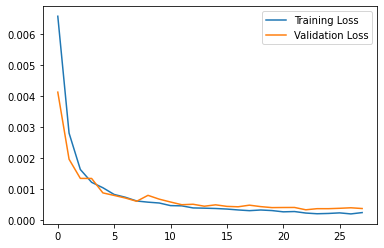

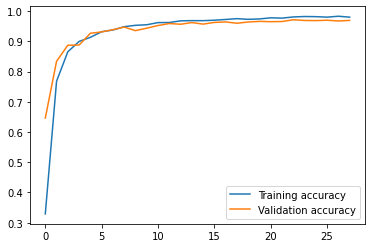

In [116]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.legend()
plt.show()